# Interconnect

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes, por lo que necesita un modelo que tenga un ROC-AUC ≥ 0.88. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

# Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

# Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

# Tabla de contenidos del proyecto

* [1 Incialización](#Capítulo_1)
* [2 Exploración datos iniciales](#Capítulo_2)
    * [2.1 Preparación de los datos](#Sección_2_1)
* [3 Validación de modelos](#Capítulo_3)
    * [3.1 División y codificación de los datos](#Sección_3_1)
    * [3.2 LogisticRegression](#Sección_3_2)
    * [3.3 DecisionTreeClassifier](#Sección_3_3)
    * [3.4 RandomForestClassifier](#Sección_3_4)
    * [3.5 LightGBM](#Sección_3_5)
    * [3.6 CatBoost](#Sección_3_6)
* [4 Conclusión](#Capítulo_4)

## Inicialización <a class="anchor" id="Capítulo_1"></a>

In [9]:
#se importan la librerias necesarias para el trabajo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [10]:
try:
    contrato = pd.read_csv('/datasets/final_provider/contract.csv')
except:
    contrato = pd.read_csv('contract.csv') 
    
try:
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
except:
    personal = pd.read_csv('personal.csv')
    
    
try:
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
except:
    internet = pd.read_csv('internet.csv')
    
    
try:
    phone = pd.read_csv('/datasets/final_provider/phone.csv')
except:
    phone = pd.read_csv('phone.csv')

## Explorar datos iniciales <a class="anchor" id="Capítulo_2"></a>

In [11]:
contrato.info()
contrato.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [12]:
personal.info()
personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [13]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [14]:
phone.info()
phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Dado que lo que queremos saber es la tasa de cancelación, entonces, pienso que debido a que vamos a utilizar la metrica de AUC-ROC, se deberían analizar los datos completos y usar los modelo para entrenar tanto el comportamiento de las personas que siguen en la compañia y las que ya no están.

El objetivo de hacer el análisis de la información es obtener un AUC-ROC superior a 0.85 por lo que se planea hacer lo siguiente:

    - Transformar los datos al tipo que le corresponda, y unir las tablas. Los datos no tienen por si solo valores nulos.
    - Una vez teniendo la base datos limpia, se procede a dividir la tabla en un conjunto de entrenamiento y en otro de 
      validación, teniendo la opción de aplicar OHE en ciertas columnas y a su vez prescindir de algunas en caso de ser tan
      relevantes para las metricas del modelo.
      
En caso de no estar balanceadas la metrica AUC-ROC podría variar en su resultado, buscando tal vez utilizar algún tipo de balanceo de pesos en los modelos, por lo que habrá que analizar la información para ver como se ecuentra distribuida la información.
      
    - Se planea Hacer el uso de al menos 4 modelos diferentes, probar diferentes hiperparametros y ver cual es el modelo que más       se acerca al objetivo del mejor AUC-ROC.
      
      1.- Modelo Dummy. Para que cualquier modelo sea mejor que el resultado obtenido por este.
      2.- LogisticRegression. 
          - class_weight: en caso de haber el desequilibrio de clases
          - random_state: usnado siempre el mismo para que no cambien los resultados una vez fijados los hiperparametros
      3.- RandomForestClassifier. Usando GridSearchCV 
          - n_estimators: Usraemos [200,300,400] esperando ver entre este rango de árboles, donde se optimiza el modelo.
          - max_depth : Usaremos [2,4,8] sin darle tanta profundidad a los árboles.
          - random_state: Lo mismo que en el modelo LogisticRegression
      4.- CatBoostClassifier. Usando un modelo que emplea el descendiete de gradiente.
          - iterations= [5,10] para no gastar tanto tiempo en los árboles que creará
          - learning_rate:  [0.5,0.10,0.01],
          - depth: Usaremos [2,4,8] sin darle tanta profundidad a los árboles.
          - random_seed : Lo mismo que en el modelo LogisticRegression
      
      
    - Con el mejor modelo del paso anterior, ajustar más los hiperparametros para mejorar el AUC-ROC  

Esto es lo que a primera vista de planea para trabajar con este proyecto.

### Preparación de los datos <a class="anchor" id="Sección_2_1"></a>

In [15]:
# en principio vamos a unir las tablas.

contrato1 = contrato.merge(personal,'left')
contrato2 = contrato1.merge(internet, 'left')
interconnect = contrato2.merge(phone, 'left')
interconnect

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


Dado que no todos tienen paquete de internet o telefonia, los Nan los sustituiremos con la palbra `no aplica`, la cual funcionará como otra categoria dentro de a base de datos.

In [16]:
interconnect.fillna('no aplica', inplace=True)
#comprobamos que ya no haya valores ausentes
print(interconnect.isna().sum())

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64


In [17]:
#cambiamos a minusculas los nombres de las columnas
interconnect.columns = interconnect.columns.str.lower()

In [18]:
#creamos la columna del target a raiz de la columna 'enddate' y a su vez eliminamos la columna 'enddate'
interconnect['target'] = (interconnect['enddate'] != 'No').astype('float64')  
interconnect.drop(['enddate'], axis=1,inplace=True)

In [19]:
#debido a que la columna 'customerid' es único e irrepetible, lo eliminamos también de la tabla
# ya que para las regresiones logicticas y  el análisis de caracterísitcas, esta columna está de más
interconnect.drop(['customerid'], axis=1,inplace=True)

In [20]:
#cambiamos el tipo de las columna a fecha
interconnect['begindate'] = pd.to_datetime(interconnect['begindate'], format='%Y-%m-%d')

In [21]:
interconnect.loc[interconnect['totalcharges'] == ' ','totalcharges'] = 0 #cambiamos los espacios a cero
interconnect['totalcharges'] = interconnect['totalcharges'].astype('float64') #cambiamos la columna a flotante
interconnect.loc[interconnect['totalcharges'] == 0 ,'totalcharges'] = interconnect['totalcharges'].mean() #los ceros los cambiamos por el promedio

In [22]:
#nos aseguramos que tienen el tipo correcto nuestra base de datos.
interconnect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   begindate         7043 non-null   datetime64[ns]
 1   type              7043 non-null   object        
 2   paperlessbilling  7043 non-null   object        
 3   paymentmethod     7043 non-null   object        
 4   monthlycharges    7043 non-null   float64       
 5   totalcharges      7043 non-null   float64       
 6   gender            7043 non-null   object        
 7   seniorcitizen     7043 non-null   int64         
 8   partner           7043 non-null   object        
 9   dependents        7043 non-null   object        
 10  internetservice   7043 non-null   object        
 11  onlinesecurity    7043 non-null   object        
 12  onlinebackup      7043 non-null   object        
 13  deviceprotection  7043 non-null   object        
 14  techsupport       7043 n

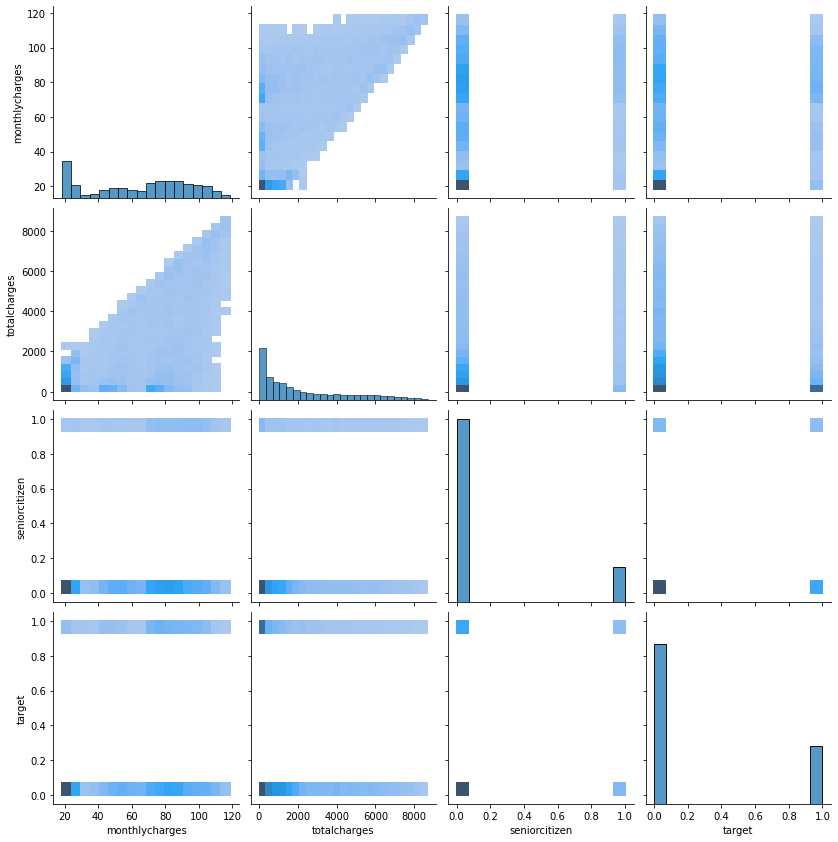

In [23]:
g = sns.pairplot(interconnect, kind='hist')
g.fig.set_size_inches(12, 12)

In [24]:
#Aplicamos un OrdinalEncoder
encoder = OrdinalEncoder()
interconnect = pd.DataFrame(encoder.fit_transform(interconnect), columns=interconnect.columns)
interconnect.describe()

,begindate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,target
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,42.964504,0.690473,0.592219,1.574329,683.524776,3102.621752,0.504756,0.162147,0.483033,0.299588,0.872923,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.615505,0.265370
std,24.202899,0.833755,0.491457,1.068104,478.511521,1941.914823,0.500013,0.368612,0.499748,0.458110,0.737796,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.656039,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,1.000000,199.000000,1382.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,0.000000,1.000000,2.000000,722.000000,3070.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,66.000000,1.000000,1.000000,2.000000,1090.000000,4780.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,76.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


Dado el describe en la tabla, y las gráficas de seaborn, podemos ver que si parace haber un desequilibrio en las clases, por lo que más adelante veremos si un submuestreo puede hacer el ajuste necesario. 

## Validación de modelos <a class="anchor" id="Capítulo_3"></a>

### División y codificación de los datos <a class="anchor" id="Sección_3_1"></a>

Dividiremos los data sets de la siguiente forma:

    - Entrenamiento (75%) 
    - Valiadación (25%)

In [25]:
#Aplicamos al inicio una codificación ordinal
features = interconnect.drop(['target'], axis=1)
target = interconnect['target']

# se crea el conjunto del data para los test
features_train, features_test, target_train, target_test = train_test_split(features,target,
                                                                              test_size=0.25, random_state=12345)


print('El tamaño de datos para el entrenamiento es:', features_train.shape,target_train.shape)
print('El tamaño de datos para la valdidación es:', features_test.shape,target_test.shape)

El tamaño de datos para el entrenamiento es: (5282, 18) (5282,)
El tamaño de datos para la valdidación es: (1761, 18) (1761,)


In [26]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        pr = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['PR'] = pr
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, PR={pr:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PR')        

        
        eval_stats[type]['Exactitud']  = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud','F1', 'PR', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

### LogisticRegression <a class="anchor" id="Sección_3_2"></a>

In [27]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear') # inicializa el constructor de regresión logística con los parámetros random_state=54321 y solver='liblinear'
model_lr.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento

LogisticRegression(random_state=12345, solver='liblinear')

           train  test
Exactitud   0.81  0.81
F1          0.59  0.59
PR          0.68  0.67
ROC AUC     0.86  0.85


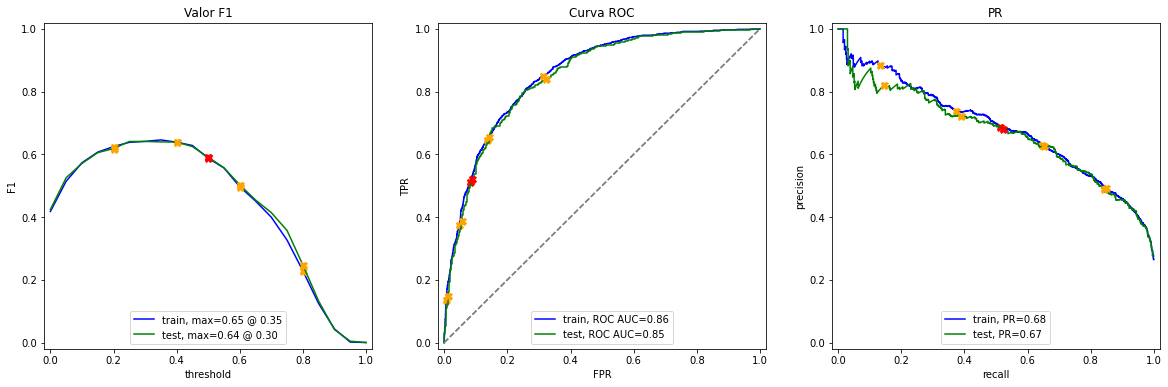

In [28]:
evaluate_model(model_lr, features_train, target_train, features_test, target_test)

### DesicionTreeClassifier <a class="anchor" id="Sección_3_3"></a>

In [29]:
%%time
#definimos los parametros
params = { 
        'max_depth' : [200,300,400],
        'min_samples_split' : [4,6,8] 
}

# leemos los datos
dtc = DecisionTreeClassifier (criterion = 'gini',random_state= 1234)
model_dtc = GridSearchCV (dtc , param_grid = params, cv = 3) 
model_dtc.fit(features_train,target_train)

CPU times: user 706 ms, sys: 5.68 ms, total: 711 ms
Wall time: 722 ms


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [200, 300, 400],
                         'min_samples_split': [4, 6, 8]})

           train  test
Exactitud   0.96  0.82
F1          0.91  0.66
PR          0.98  0.62
ROC AUC     0.99  0.80


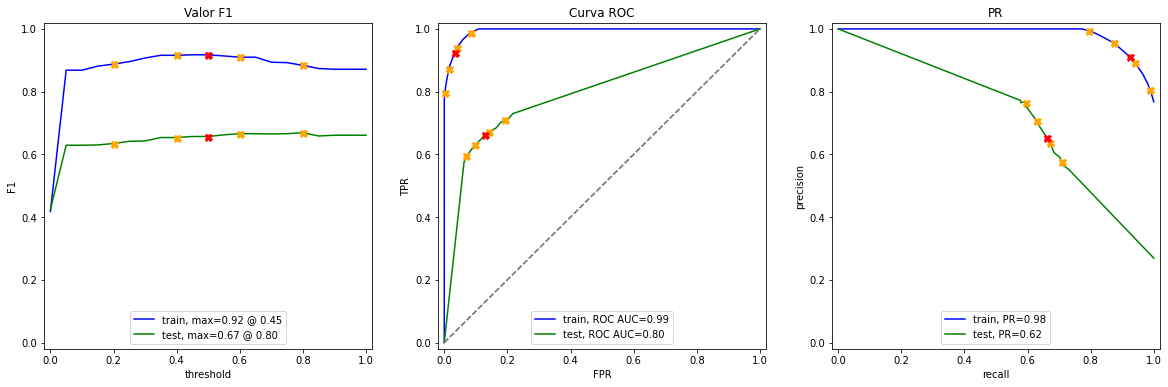

In [30]:
evaluate_model(model_dtc, features_train, target_train, features_test, target_test)

### RandomForestClassifier <a class="anchor" id="Sección_3_4"></a>

In [31]:
%%time
#definimos los parametros
params = { 
        'n_estimators': [100,150,200],
        'max_depth' : [2,4,8] 
}

# leemos los datos 
rfc = RandomForestClassifier (criterion = 'gini',random_state= 1234)
model_rfc = GridSearchCV (rfc , param_grid = params, cv = 3) 
model_rfc.fit(features_train,target_train)

CPU times: user 14.9 s, sys: 23.9 ms, total: 14.9 s
Wall time: 14.9 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1234),
             param_grid={'max_depth': [2, 4, 8],
                         'n_estimators': [100, 150, 200]})

           train  test
Exactitud   0.86  0.82
F1          0.71  0.62
PR          0.85  0.76
ROC AUC     0.93  0.88


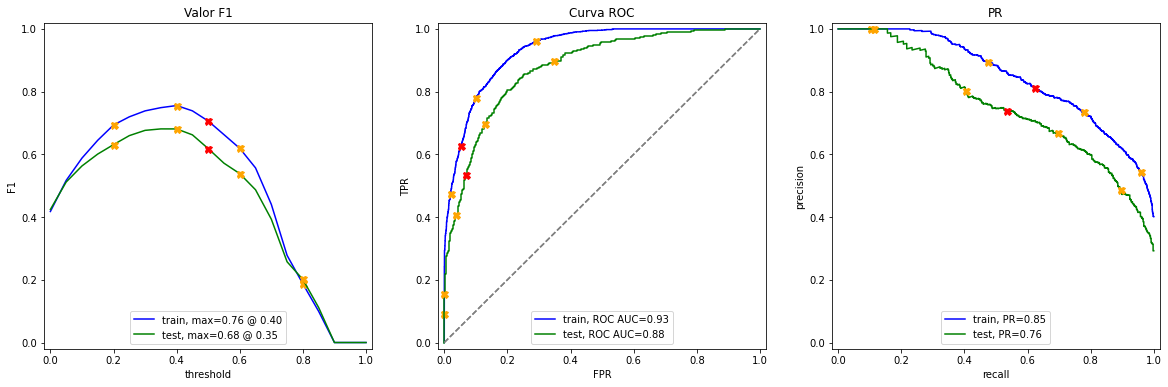

In [32]:
evaluate_model(model_rfc, features_train, target_train, features_test, target_test)

### LightGBM <a class="anchor" id="Sección_3_4"></a>

In [33]:
%%time
#definimos los parametros
params = { 
    'num_leaves': [10],
    'learning_rate': [0.5,0.10,0.01],
    'max_depth': [4,6]
}

# leemos los datos dentro de lightgbm
lgb_clf = LGBMClassifier(objective = 'binary',random_state= 1234)
model_lgb_clf = GridSearchCV (lgb_clf , param_grid = params, cv = 3) 
model_lgb_clf.fit(features_train,target_train)

CPU times: user 3.59 s, sys: 43.6 ms, total: 3.63 s
Wall time: 3.68 s


GridSearchCV(cv=3,
             estimator=LGBMClassifier(objective='binary', random_state=1234),
             param_grid={'learning_rate': [0.5, 0.1, 0.01], 'max_depth': [4, 6],
                         'num_leaves': [10]})

           train  test
Exactitud   0.96  0.90
F1          0.92  0.79
PR          0.98  0.89
ROC AUC     0.99  0.93


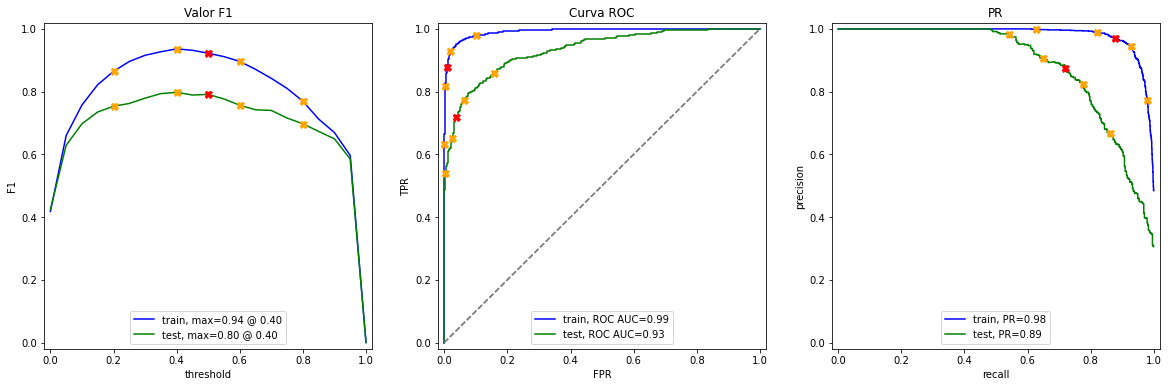

In [34]:
evaluate_model(model_lgb_clf, features_train, target_train, features_test, target_test)

### CatBoost <a class="anchor" id="Sección_3_4"></a>

In [35]:
#definimos los parametros
params = { 
    'iterations': [10,50,100],
    'learning_rate': [0.5,0.10,0.01],
    'depth': [4,6]
}

# leemos los datos
cbc = CatBoostClassifier(eval_metric='AUC',random_state= 1234)
model_cbc = GridSearchCV (cbc , param_grid = params, cv = 3) 
model_cbc.fit(features_train,target_train)

0:	total: 47.1ms	remaining: 424ms
1:	total: 48.6ms	remaining: 194ms
2:	total: 49.7ms	remaining: 116ms
3:	total: 50.7ms	remaining: 76ms
4:	total: 51.8ms	remaining: 51.8ms
5:	total: 52.8ms	remaining: 35.2ms
6:	total: 54ms	remaining: 23.1ms
7:	total: 55.1ms	remaining: 13.8ms
8:	total: 56.2ms	remaining: 6.24ms
9:	total: 57ms	remaining: 0us
0:	total: 1.26ms	remaining: 11.4ms
1:	total: 2.51ms	remaining: 10.1ms
2:	total: 3.79ms	remaining: 8.84ms
3:	total: 5.12ms	remaining: 7.69ms
4:	total: 6.51ms	remaining: 6.51ms
5:	total: 7.75ms	remaining: 5.16ms
6:	total: 8.98ms	remaining: 3.85ms
7:	total: 10.2ms	remaining: 2.55ms
8:	total: 11.5ms	remaining: 1.28ms
9:	total: 12.4ms	remaining: 0us
0:	total: 1.17ms	remaining: 10.5ms
1:	total: 2.33ms	remaining: 9.3ms
2:	total: 3.51ms	remaining: 8.18ms
3:	total: 4.82ms	remaining: 7.22ms
4:	total: 6.22ms	remaining: 6.22ms
5:	total: 7.38ms	remaining: 4.92ms
6:	total: 8.69ms	remaining: 3.73ms
7:	total: 9.86ms	remaining: 2.46ms
8:	total: 11.1ms	remaining: 1.23ms
9

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f15ed415a60>,
             param_grid={'depth': [4, 6], 'iterations': [10, 50, 100],
                         'learning_rate': [0.5, 0.1, 0.01]})

           train  test
Exactitud   0.94  0.88
F1          0.88  0.76
PR          0.96  0.88
ROC AUC     0.98  0.93


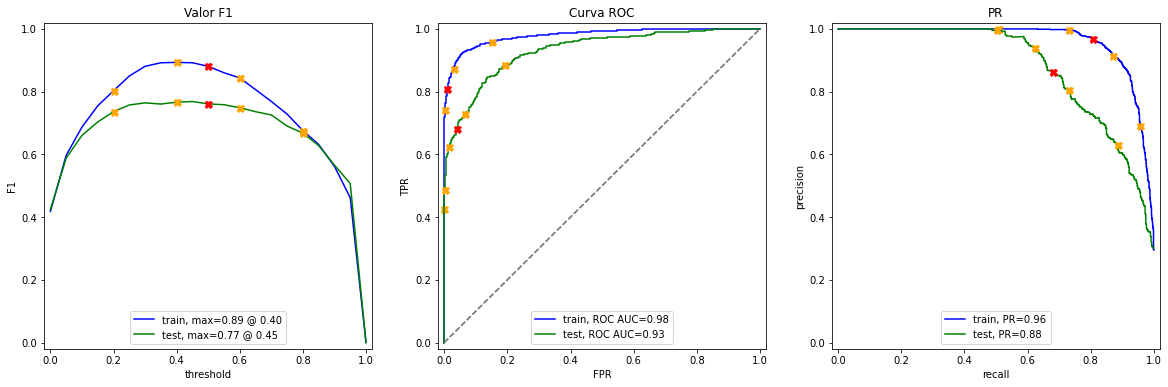

In [36]:
evaluate_model(model_cbc, features_train, target_train, features_test, target_test)

## Conclusión <a class="anchor" id="Capítulo_4"></a>

Se muestra a continuación los resultados de los modelos utilizados y el valor de sus metricas tanto en la base de datos de entrenamiento como de pruebas:

    - LogisticRegressor
    
                   train  test
        Exactitud   0.81  0.81
        F1          0.59  0.59
        PR          0.68  0.67
        ROC AUC     0.86  0.85
    
    - DecisionTreeClassifier
    
                   train  test
        Exactitud   0.96  0.82
        F1          0.91  0.66
        PR          0.98  0.62
        ROC AUC     0.99  0.80
    
    - RandomForestClassifier 
    
                   train  test
        Exactitud   0.86  0.82
        F1          0.71  0.62
        PR          0.85  0.76
        ROC AUC     0.93  0.88
    
    - LightGBM Regressor
    
                   train  test
        Exactitud   0.96  0.90
        F1          0.92  0.79
        PR          0.98  0.89
        ROC AUC     0.99  0.93
        
    - CatBoost Regressor
    
                   train  test
        Exactitud   0.94  0.88
        F1          0.88  0.76
        PR          0.96  0.88
        ROC AUC     0.98  0.93
        

El modelo `LightGBM` fue mejor por muy poco que el modelo `CatBoost`, donde podemo ver que el valor `ROC AUC` es de 0.93 con la base de datos de prueba, lo cual nos dice que a pesar de haber desequilibrio en nuestro `target`, el modelo puede predecir de manera muy eficiente la tasa de cancelación de clientes por sitinguir bien entre los verdaderos postivos y los falsos potivos, también, tenemos un valor de `Exactitud` del 0.88, que es alto debido al desequilibrio de clases, más un valor de `F1` de 0.76, que si bien no es alto, aún así nos dice que el modelo tienen un valor aceptable de Precission y Recall.